# Peer Graded Assignment
## Battle of Neighbourhoods
### Subject: Brexit: A Challenge or Opportunity for Catering Industry - Data Analysis of London Restaurant
### By: Charles Tsang
#### Introduction
Twenty-Twenty has a landmark ring to it. The Start of a new decade prompts bigger-than-usual thought about the future. Britain’s reckoning with Brexit will leave a significant impact on the hospitality and food industry. However, Brexit does offer the potential for re-setting the direction of food business throughout the UK. 
Throughout its history, London’s dominance has often been portrayed as a ‘problem’ for its host nation. Apart from that, it is simultaneously the political, economic, business and cultural art centre. Therefore, London is very diverse. There are many different restaurants around London, including French, Italian, Asian, African, Middle Eastern and American ones. 


#### Business Problem Description
As an investor agent, we are looking to take its opportunity to explore expansion after the Brexit. Lack of confidence, some restaurants are decided to shut down their business and moved back to their countries. Along with recent organic trend, many restaurants/cafés are available to rent in this moment. Traditionally, London is overwhelmingly seen as expensive and inaccessible. The preliminary target is to create a high-end / fine dining restaurants with organic mix and healthy. In order to survive in such competitive market, a strategic plan is essential. Wanna bet? Below factors will be explored in order to decide on the physical location in London:
1.	London Population
2.	London Demographics
3.	The location competitors
4.	Cuisine and Ingredient served by competitors
5.	Segmentation of Market
When we consider all these factors, we can create a map and information chart where to establish the restaurant, ingredient used and each district is clustered according to the venue density.


#### Target Audience
Considering the diversity of London, there is a high multicultural sense. It ranges from Londoners, tourists and those who are passionate about organic food. To recommend the correct location, our company has appointed me to work on Data Science project for researching the best choice. This research would help anyone who wants to start their catering business on organic food in London after the Brexit.

#### Success Criteria
The success criteria of the project will be a good recommendation of borough/Neighborhood choice and nearest suppliers of ingredients for organic restaurant.

#### Data Description
To consider the problem, we can list the data as below:
One city will be analyzed in this project: London. And this project will base on the public data from Wikipedia and Foursquare. 
In the Wikipedia, the London is treated as synonymous to the “Great London Area”, meaning there are the areas within the London Area Postcode. In my project, we focus only in the neighborhoods within the London Post Code. Hence, the London area consists 32 Boroughs and the “City of London“. The dataset exists for free on the web. Link to the dataset is https://en.wikipedia.org/wiki/List_of_areas_of_London

In [1]:
# library for BeautifulSoup
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
print('...Done')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


In [2]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(wikipedia_link, headers = headers)
wikipedia_page

<Response [200]>

In [3]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody

In [4]:
rows = table.find_all('tr')
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]
df = pd.DataFrame(columns = columns)
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref


In [6]:
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [7]:
df.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [8]:
df = df.rename(index=str, columns = {'Location': 'Location', 'London\xa0borough': 'Borough', 'Post town': 'Post-town', 'Postcode\xa0district': 'Postcode', 'Dial\xa0code': 'Dial-code', 'OS grid ref': 'OSGridRef'})
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


There is some borough names with [] in the wikipedia page. So remove these, the following was done:

In [9]:
df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [10]:
df.shape
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


Because of the data call limiation of the Foursquare API, we will focus the represenative on South East London with below assumption:

**Assumption 1**: We will have multi-rows and assigned the same values from the other columns when the postcode is found more than one

In [11]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [13]:
df0.head(5)

,Location,Borough,Post-town,Dial-code,OSGridRef,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
10,Angel,Islington,LONDON,020,TQ345665,EC1
10,Angel,Islington,LONDON,020,TQ345665,N1


In [14]:
df0.shape

(1274, 6)

**Assumption 2**: We will use the 'Location', 'Borough', 'Postcode', 'Post-town' fields and extracted into a new data frame

In [15]:
df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)

In [16]:
df1.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [17]:
df1.shape

(1274, 4)

**Assumption 3**: We assume that the restaurant open for the Boroughs with London Post-town. Therefore, all the non-post-town are dropped.

In [18]:
df2 = df1
df21 = df2[df2['Post-town'].str.contains('LONDON')]

In [19]:
df21.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [20]:
df21.shape

(762, 4)

There are now 762 instances, drop of 512 instances from non-London post-towns.

In [21]:
# Re-assigns the df21 to new dataframe without the Post-town
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)

In [22]:
df3.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [23]:
df_london = df3
df_london.to_csv('LondonLocations.csv', index = False)

**Assumption 4**: Only the South East areas of London will be used for our analysis because of its more diverse outlook, proximity to afro-caribbean markets and accessible facilities. It is given that the South East areas has postcodes with SE.

In [24]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [25]:
df_london.Postcode = df_london.Postcode.str.strip()

In [26]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [27]:
# New dataframe for South East London postcodes - df_se
df_se = df_london[df_london['Postcode'].str.startswith(('SE'))].reset_index(drop=True)
df_se.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Tulse Hill,Lambeth,SE24
2,Tulse Hill,Lambeth,SE27
3,Upper Norwood,Croydon,SE19
4,Walworth,Southwark,SE17
5,Well Hall,Greenwich,SE9
6,West Heath,Bexley,SE2
7,West Norwood,Lambeth,SE27
8,Westcombe Park,Greenwich,SE3
9,Woolwich,Greenwich,SE18


**Assumption 5** We will check the demography of London, mapping the proportion of races by London borough. 

In [28]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
demograph_page = requests.get(demograph_link, headers = headers)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
           for i in rows1[0].find_all('th')]

In [35]:
columns1

['Local authority', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [36]:
demo_london = pd.DataFrame(columns = columns1)

In [37]:
demo_london.head(5)

,Local authority,White,Mixed,Asian,Black,Other


In [38]:
for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)

        demo_london

In [39]:
demo_london['Black'] = demo_london['Black'].astype('float')

In [40]:
demo_london_sorted = demo_london.sort_values(by='Black', ascending = False)

In [41]:
demo_london_sorted.head(5)

,Local authority,White,Mixed,Asian,Black,Other
22,Lewisham,53.5,7.4,9.3,27.2,2.6
27,Southwark,54.3,6.2,9.4,26.9,3.3
21,Lambeth,57.1,7.6,6.9,25.9,2.4
11,Hackney,54.7,6.4,10.5,23.1,5.3
7,Croydon,55.1,6.6,16.4,20.2,1.8


**Assumption 6**: We got a significantly founding from above result, Lewisham, Southward, Lambeth, Hackney and Croydon have a relatively high results in Black. This may produce an opportunity for us to drill down on the catering and eating habit for the Black. Also, it produces a physical needs to set up Black restaurant. 

In [42]:
df_se

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Tulse Hill,Lambeth,SE24
2,Tulse Hill,Lambeth,SE27
3,Upper Norwood,Croydon,SE19
4,Walworth,Southwark,SE17
5,Well Hall,Greenwich,SE9
6,West Heath,Bexley,SE2
7,West Norwood,Lambeth,SE27
8,Westcombe Park,Greenwich,SE3
9,Woolwich,Greenwich,SE18


In [43]:
df_se_top = df_se[df_se['Borough'].isin(['Lewisham', 'Southwark', 'Lambeth', 'Hackney', 'Croydon'])].reset_index(drop=True)

In [44]:
df_se_top.head(5)

,Location,Borough,Postcode
0,Tulse Hill,Lambeth,SE24
1,Tulse Hill,Lambeth,SE27
2,Upper Norwood,Croydon,SE19
3,Walworth,Southwark,SE17
4,West Norwood,Lambeth,SE27


In [45]:
df_se_top.shape

(92, 3)

In [46]:
df_se.shape

(160, 3)

There are now 92 instances in South East London area for Black analysis.

Besides, the Geocoder package is used to obtain South East London data area such as the latitude and longitude for further analysis. 

In [47]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

In [48]:
# Test the postcode
sample = get_latlng('SE2')
sample

[51.492450000000076, 0.12127000000003818]

In [49]:
# Test the geocodefarm geocoder
gg = geocoder.geocodefarm(sample, method = 'reverse')
gg

<[OK] Geocodefarm - Reverse [Harrow Manor Way, London, SE2 9SW, United Kingdom]>

In [50]:
start = time.time()

postal_codes = df_se_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  50.95008373260498 seconds


Adding back the latitude and longitude to the previous dataframe - df_se_top and it becomes:

In [51]:
df_se_loc = df_se_top
df_se_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_se_loc['Latitude'] = df_se_coordinates['Latitude']
df_se_loc['Longitude'] = df_se_coordinates['Longitude']

In [52]:
df_se_loc.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Tulse Hill,Lambeth,SE24,51.45529,-0.09928
1,Tulse Hill,Lambeth,SE27,51.43407,-0.10375
2,Upper Norwood,Croydon,SE19,51.41990,-0.08808
3,Walworth,Southwark,SE17,51.48764,-0.09542
4,West Norwood,Lambeth,SE27,51.43407,-0.10375


In [53]:
df_se_loc.to_csv('SELondonLocationsCoordinates.csv', index = False)

In [54]:
df_se_loc.shape

(92, 5)

Moreover, the Foursquare API will be used to get the geographical location for the London area, as well as leveraging to provision venues information for each neighborhood. Then, the venue will provide the categories needed for the analysis to determine the viability of the selected location for the restaurant. Link for the Foursquare API is https://developer.foursquare.com/

In [55]:
CLIENT_ID = 'BFGCRBNWLJV3QFVQB3HB2SKSUVAWVFOQPIUDEA1ENKWUBY0V' 
CLIENT_SECRET = 'N1YZNCIKYCLK0MACNMZOEVRS0CYAZELABW1M23JPQ3RW5FVI' 
VERSION = '20190211' 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BFGCRBNWLJV3QFVQB3HB2SKSUVAWVFOQPIUDEA1ENKWUBY0V
CLIENT_SECRET:N1YZNCIKYCLK0MACNMZOEVRS0CYAZELABW1M23JPQ3RW5FVI


#### How the data used to solve the problem
Both datasets can consider the venue within the neighborhood of London Postcode area. Within a certain mile radius, the restaurant can be treated as the types of restaurant. Because of the Foursquare API constraint, the limit is 100 venues and the radius is 750 meter for each borough from their given latitude and longitude information. The accessibility and ease of supplies of ingredients are considered. Also, amenities and transportation connection are correlated.

#### Methodology
Our primary goal is to get the optimum location for new restaurant business in London area. The Foursquare workability can help to examine it. The Lewisham Borough postcode SE13 and Location can be studied. The latitude and longitude values of London can also be obtained. The South East London neighborhoods are zoomed to see the superimposed areas.

First of all, the exploratory data anlysis is executed. I load the data and explore the data from json file. Then, I use the pandas dataframe to transform the data into the nested dictionaries by python language in juypter notebook. More importantly, this dataframe has its geographical coordinates of London city neighborhoods. The data of Foursquare can be used for analysis. Apart from that, London city map can be created with neighborhoods with geopy and folium libraries. 

*Single Neighborhood*

First of all, we will set up a single Neighbourhood within the London area was done to examine the Foursquare workability. The Lewisham Borough postcode SE13 and Location - Lewisham is our case

In [56]:
se_df = df_se_loc.reset_index().drop('index', axis = 1)

In [57]:
se_df.shape

(92, 5)

In [58]:
se_df.loc[se_df['Location'] == 'Lewisham']

,Location,Borough,Postcode,Latitude,Longitude
25,Lewisham,Lewisham,SE13,51.46196,-0.00754
77,Lewisham,Lewisham,SE13,51.46196,-0.00754


In [59]:
se_df.loc[25, 'Location']

'Lewisham'

In [60]:
lewisham_lat = se_df.loc[25, 'Latitude']
lewisham_long = se_df.loc[25, 'Longitude']
lewisham_loc = se_df.loc[25, 'Location']
lewisham_postcode = se_df.loc[25, 'Postcode']

print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(lewisham_loc,
                                                                                         lewisham_postcode,
                                                                                         lewisham_lat,
                                                                                         lewisham_long))

The latitude and longitude values of Lewisham with postcode SE13, are 51.46196000000003, -0.007539999999949032.


In [61]:
print('Explore the top 100 venues that are within a 2000 metres radius of Lewisham.')

Explore the top 100 venues that are within a 2000 metres radius of Lewisham.


In [62]:
# Credentials are provided already for this part
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lewisham_lat, 
    lewisham_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=BFGCRBNWLJV3QFVQB3HB2SKSUVAWVFOQPIUDEA1ENKWUBY0V&client_secret=N1YZNCIKYCLK0MACNMZOEVRS0CYAZELABW1M23JPQ3RW5FVI&v=20190211&ll=51.46196000000003,-0.007539999999949032&radius=2000&limit=100'

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5b6205542890001b0c25aa'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lewisham Central',
  'headerFullLocation': 'Lewisham Central, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 178,
  'suggestedBounds': {'ne': {'lat': 51.47996001800005,
    'lng': 0.021296961190459426},
   'sw': {'lat': 51.44395998200002, 'lng': -0.03637696119035749}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '535823bc498ec8d8da9aad5f',
       'name': 'Street Feast Model Market',
       'location': {'address': '196 Lewisham High St',
        'crossStreet': 'entrance at Molesworth St',
        'lat': 51.46020945743763,
        'lng': -0.01

In [64]:
# Extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [65]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [66]:
nearby_venues

,name,categories,lat,lng
0,Street Feast Model Market,Street Food Gathering,51.460209,-0.012199
1,Maggie's Kitchen,Café,51.465380,-0.011213
2,Levante restaurant,Restaurant,51.462072,-0.009491
3,Corte,Coffee Shop,51.459776,-0.011554
4,Manor House Gardens,Park,51.456686,0.004684
5,Dirty South,Pub,51.458846,-0.002666
6,Levante Pide Restaurant,Turkish Restaurant,51.459848,-0.011476
7,Blackheath Farmers' Market,Farmers Market,51.465913,0.007945
8,Côte Brasserie,French Restaurant,51.467378,0.007176
9,Gennaro Delicatessan,Deli / Bodega,51.461765,-0.009726


Grouping the cateogory and we can get

In [67]:
nearby_venues_lewisham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')

In [68]:
nearby_venues_lewisham_unique.head(5)

,Count
Pub,14
Café,9
Gastropub,7
Park,5
Garden,4


Interestingly, it is found that there is no African restaurant found in Lewisham. Based on the statistic, each neighborhood are regrouped and categorized even though there are restaurants are the Lewisham area, they are not even in the top 5 venues. It may be subjected by data availability. Usually, 100 venues were returned for Lewisham with Foursquare API.

*Multiple Neighbourhoods*

The function getNearbyVenues is used to loop for all neighborhoods in South East London.

In [69]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

A new dataframe is set up - london_venues.

In [70]:
se_venues = getNearbyVenues(names=se_df['Location'],
                                   latitudes=se_df['Latitude'],
                                   longitudes=se_df['Longitude']
                                  )

Tulse Hill
Tulse Hill
Upper Norwood
Walworth
West Norwood
Crofton Park
Denmark Hill
Deptford
Dulwich
East Dulwich
Elephant and Castle
Elephant and Castle
Elephant and Castle
Bankside
Forest Hill
Gipsy Hill
Gipsy Hill
Grove Park
Herne Hill
Hither Green
Honor Oak
Ladywell
Ladywell
Lambeth
Lee
Lewisham
New Cross
Newington
Newington
Nunhead
Oval
Bellingham
Peckham
Rotherhithe
Selhurst
Bermondsey
South Norwood
Southend
St Johns
Surrey Quays
Tulse Hill
Tulse Hill
Upper Norwood
Walworth
Blackheath
West Norwood
Bankside
Bellingham
Bermondsey
Blackheath
Brixton
Brockley
Camberwell
Catford
Chinbrook
Brixton
Brockley
Crofton Park
Denmark Hill
Deptford
Dulwich
East Dulwich
Elephant and Castle
Elephant and Castle
Elephant and Castle
Forest Hill
Gipsy Hill
Gipsy Hill
Grove Park
Camberwell
Herne Hill
Hither Green
Honor Oak
Ladywell
Ladywell
Lambeth
Lee
Lewisham
Catford
New Cross
Newington
Newington
Nunhead
Oval
Peckham
Rotherhithe
Selhurst
South Norwood
Southend
Chinbrook
St Johns
Surrey Quays


In [71]:
se_venues.shape

(8456, 7)

In [72]:
len(se_venues)

8456

In [73]:
se_venues['Neighbourhood'].value_counts()
se_venues.to_csv('se_venues.csv')

In [74]:
se_venues.head(5)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tulse Hill,51.45529,-0.09928,Herne Hill Market,51.452731,-0.102042,Farmers Market
1,Tulse Hill,51.45529,-0.09928,Canopy Beer Co.,51.452007,-0.101134,Brewery
2,Tulse Hill,51.45529,-0.09928,Half Moon,51.452650,-0.100722,Pub
3,Tulse Hill,51.45529,-0.09928,Brockwell Park,51.450931,-0.106065,Park
4,Tulse Hill,51.45529,-0.09928,Perks & White,51.453064,-0.102543,Coffee Shop


In [75]:
se_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bankside,200,200,200,200,200,200
Bellingham,134,134,134,134,134,134
Bermondsey,200,200,200,200,200,200
Blackheath,178,178,178,178,178,178
Brixton,200,200,200,200,200,200
Brockley,200,200,200,200,200,200
Camberwell,200,200,200,200,200,200
Catford,134,134,134,134,134,134
Chinbrook,102,102,102,102,102,102


In [76]:
print('There are {} uniques categories.'.format(len(se_venues['Venue Category'].unique())))

There are 197 uniques categories.


In [77]:
se_venue_unique_count = se_venues['Venue Category'].value_counts().to_frame(name='Count')

In [78]:
se_venue_unique_count.head(5)

,Count
Pub,904
Coffee Shop,604
Café,546
Park,412
Grocery Store,292


In [79]:
se_venue_unique_count.describe()

,Count
count,197.000000
mean,42.923858
std,97.401647
min,2.000000
25%,8.000000
50%,14.000000
75%,38.000000
max,904.000000


#### Clustering

Finally, I create clusters of the neighborhood using the k-means to cluster the neighborhood into 5 clusters.

In [80]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [81]:
# df_london_coordinates
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

In [82]:
# Adding markers to map
for lat, lng, borough, loc in zip(se_df['Latitude'], 
                                  se_df['Longitude'],
                                  se_df['Borough'],
                                  se_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

In [83]:
type(se_df)

pandas.core.frame.DataFrame

Now, it is time to check and explore the venues in each neighbourhood.

In [84]:
# one hot encoding
se_onehot = pd.get_dummies(se_venues[['Venue Category']], prefix = "", prefix_sep = "")

In [85]:
se_onehot['Neighbourhood'] = se_venues['Neighbourhood']
fixed_columns = [se_onehot.columns[-1]] + list(se_onehot.columns[:-1])
se_onehot = se_onehot[fixed_columns]

In [86]:
se_onehot.loc[se_onehot['African Restaurant'] != 0]

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
231,Upper Norwood,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
347,Walworth,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
635,Denmark Hill,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [87]:
se_onehot.loc[se_onehot['Neighbourhood'] == 'Lewisham']

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
2387,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2388,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2389,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

We got the superising result that there is no Black restuarant in Lewisham even there are relatively huge group of Black people living in Lewisham

In [88]:
se_onehot.to_csv('selondon_onehot.csv', index = False)

In [89]:
se_onehot.shape

(8456, 198)

*Regrouping the category*

In [90]:
se_grouped = se_onehot.groupby('Neighbourhood').mean().reset_index()
se_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Canal,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Observatory,Office,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Social Club,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Theater,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Bankside,0.00,0.000000,0.0,0.0,0.000000,0.01,0.03,0.0,0.02,0.0,0.0,0.0,0.010000,0.010000,0.01,0.00,0.0,0.01,0.01,0.01,0.01,0.0,0.000000,0.01,0.02,0.0,0.000000,0.010000,0.0,0.0,0.00,0.01,0.000000,0.0,0.000000,0.030000,0.100000,0.0,0.00,0.000000,0.010000,0.00,0.00,0.01,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.020000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.0,0.010000,0.0,0.0,0.000000,0.00,0.010000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.020000,0.010000,0.020000,0.0,0.0,0.000000,0.000000,0.000000,0.01,0.0,0.070000,0.01,0.0,0.000000,0.01,0.000000,0.0,0.0,0.000000,0.050000,0.000000,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.01,0.0,0.01,0.000000,0.000000,0.00,0.020000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.010000,0.070000,0.0,0.00,0.00,0.000000,0.020000,0.000000,0.0,0.000000,0.03,0.0,0.03,0.01,0.000000,0.000000,0.01,0.0,0.000000,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.02,0.000000,0.0,0.0,0.01,0.000000,0.050000,0.0,0.0,0.0,0.010000,0.000000,0.0,0.000000,0.01,0.01,0.000000,0.0,0.020000,0.0,0.00,0.00,0.000000
1,Bellingham,0

In [91]:
print("Before One-hot encoding:", se_df.shape)

Before One-hot encoding: (92, 5)


In [92]:
print("After One-hot encoding:", se_grouped.shape)

After One-hot encoding: (40, 198)


In [93]:
se_grouped.to_csv('london_grouped.csv', index = False)

In [94]:
# Top common venues needed
num_top_venues = 10

for hood in se_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = se_grouped[se_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bankside----
                venue  freq
0         Coffee Shop  0.10
1                 Pub  0.07
2               Hotel  0.07
3  Italian Restaurant  0.05
4             Theater  0.05
5      Scenic Lookout  0.03
6        Cocktail Bar  0.03
7          Art Museum  0.03
8  Seafood Restaurant  0.03
9        Burger Joint  0.02


----Bellingham----
                  venue  freq
0         Grocery Store  0.12
1                  Park  0.09
2           Supermarket  0.07
3                  Café  0.06
4  Fast Food Restaurant  0.04
5    Italian Restaurant  0.04
6                   Pub  0.04
7           Coffee Shop  0.04
8         Train Station  0.03
9           Gas Station  0.03


----Bermondsey----
                venue  freq
0         Coffee Shop  0.10
1                 Pub  0.07
2               Hotel  0.07
3  Italian Restaurant  0.05
4             Theater  0.05
5      Scenic Lookout  0.03
6        Cocktail Bar  0.03
7          Art Museum  0.03
8  Seafood Restaurant  0.03
9        Burger Joint  

In [95]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [96]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = se_grouped['Neighbourhood']

for ind in np.arange(se_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(se_grouped.iloc[ind, :], num_top_venues)

In [97]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bankside,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Scenic Lookout,Cocktail Bar,Seafood Restaurant,Art Museum,Pizza Place
1,Bellingham,Grocery Store,Park,Supermarket,Café,Coffee Shop,Pub,Fast Food Restaurant,Italian Restaurant,Train Station,Gas Station
2,Bermondsey,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Scenic Lookout,Cocktail Bar,Seafood Restaurant,Art Museum,Pizza Place
3,Blackheath,Pub,Grocery Store,Coffee Shop,Park,Clothing Store,Café,Italian Restaurant,Supermarket,Garden,Bakery
4,Brixton,Café,Coffee Shop,Pub,Park,Cocktail Bar,Italian Restaurant,Middle Eastern Restaurant,Brewery,Grocery Store,Pizza Place


In [98]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)

In [99]:
se_grouped_clustering = se_grouped.drop('Neighbourhood', 1)

#### Clustering of Neighbourhoods

Then, we create clusters of the neighbourhood using the k-means to cluster the neighbourhood into 5 clusters.

In [100]:
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(se_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 4, 1, 3, 1, 0, 0, 3], dtype=int32)

Now we set up new dataframe, including the clusters as well as the top 10 venues for each neighbourhoods.

In [102]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [103]:
se_merged = se_df
se_merged.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Tulse Hill,Lambeth,SE24,51.45529,-0.09928
1,Tulse Hill,Lambeth,SE27,51.43407,-0.10375
2,Upper Norwood,Croydon,SE19,51.41990,-0.08808
3,Walworth,Southwark,SE17,51.48764,-0.09542
4,West Norwood,Lambeth,SE27,51.43407,-0.10375


In [104]:
# match/merge SE London data with latitude/longitude for each neighborhood
se_merged_latlong = se_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Location')

In [105]:
se_merged_latlong.head(5)

,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tulse Hill,Lambeth,SE24,51.45529,-0.09928,1,Coffee Shop,Pub,Café,Grocery Store,Bakery,Park,Pizza Place,Brewery,Gym / Fitness Center,Tapas Restaurant
1,Tulse Hill,Lambeth,SE27,51.43407,-0.10375,1,Coffee Shop,Pub,Café,Grocery Store,Bakery,Park,Pizza Place,Brewery,Gym / Fitness Center,Tapas Restaurant
2,Upper Norwood,Croydon,SE19,51.41990,-0.08808,4,Pub,Café,Park,Coffee Shop,Italian Restaurant,Grocery Store,Train Station,Gastropub,Bakery,Breakfast Spot
3,Walworth,Southwark,SE17,51.48764,-0.09542,3,Pub,Café,Coffee Shop,Park,Pizza Place,Italian Restaurant,Art Gallery,Theater,Cricket Ground,Brewery
4,West Norwood,Lambeth,SE27,51.43407,-0.10375,4,Pub,Coffee Shop,Grocery Store,Café,Park,Bakery,Pizza Place,Gym / Fitness Center,Pharmacy,Indian Restaurant


In [106]:
se_clusters = se_merged_latlong

To select the optimal k, the **elbow method** is used, together with the Sum of the Squared Error (SSE). In this method, the cluster is selected with the minimum SSE. After trying 500 iteration, optimal k is 3

In [107]:
%matplotlib inline
import matplotlib
import numpy as np

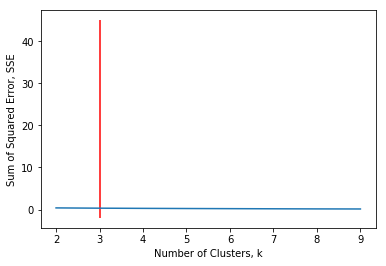

In [108]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 10):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(se_grouped_clustering)
    se_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
# vertical line
plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

After trying 500 iteration, optimal k is 3

In order to prevent the statistical bias method, **Silhouette coefficient** is tried. The rule is that the highest Sihouette Coefficent gives the best cluster.

In [109]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 10):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(se_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(se_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.5525177481443063
Where n_clusters = 3, the Silhouette Coefficient is 0.6137947110834564
Where n_clusters = 4, the Silhouette Coefficient is 0.6417146826261803
Where n_clusters = 5, the Silhouette Coefficient is 0.7045280755831057
Where n_clusters = 6, the Silhouette Coefficient is 0.7383416740379938
Where n_clusters = 7, the Silhouette Coefficient is 0.7877959412503065
Where n_clusters = 8, the Silhouette Coefficient is 0.8612333654756359
Where n_clusters = 9, the Silhouette Coefficient is 0.9360783125739889


In [110]:
se_clusters.columns

Index(['Location', 'Borough', 'Postcode', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [111]:
# Visualizing cluster in map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(se_clusters['Latitude'], se_clusters['Longitude'], se_clusters['Location'], se_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

**Cluster 1**

In [112]:
se_clusters.loc[se_clusters['Cluster Labels'] == 0, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Lewisham,0,Grocery Store,Pub,Park,Café,Supermarket,Gym / Fitness Center,Italian Restaurant,Indian Restaurant,Train Station,Coffee Shop
24,Lewisham,0,Grocery Store,Pub,Park,Café,Supermarket,Gym / Fitness Center,Italian Restaurant,Indian Restaurant,Train Station,Coffee Shop
31,Lewisham,0,Grocery Store,Park,Supermarket,Café,Coffee Shop,Pub,Fast Food Restaurant,Italian Restaurant,Train Station,Gas Station
37,Lewisham,0,Grocery Store,Park,Supermarket,Café,Coffee Shop,Pub,Fast Food Restaurant,Italian Restaurant,Train Station,Gas Station
47,Lewisham,0,Grocery Store,Park,Supermarket,Café,Coffee Shop,Pub,Fast Food Restaurant,Italian Restaurant,Train Station,Gas Station
53,Lewisham,0,Grocery Store,Park,Supermarket,Café,Coffee Shop,Pub,Fast Food Restaurant,Italian Restaurant,Train Station,Gas Station
54,Lewisham,0,Grocery Store,Pub,Park,Café,Supermarket,Gym / Fitness Center,Italian Restaurant,Indian Restaurant,Train Station,Coffee Shop
68,Lewisham,0,Grocery Store,Pub,Park,Café,Supermarket,Gym / Fitness Center,Italian Restaurant,Indian Restaurant,Train Station,Coffee Shop
76,Lewisham,0,Grocery Store,Pub,Park,Café,Supermarket,Gym / Fitness Center,Italian Restaurant,Indian Restaurant,Train Station,Coffee Shop
78,Lewisham,0,Grocery Store,Park,Supermarket,Café,Coffee Shop,Pub,Fast Food Restaurant,Italian Restaurant,Train Station,Gas Station


**Cluster 2**

In [113]:
se_clusters.loc[se_clusters['Cluster Labels'] == 1, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lambeth,1,Coffee Shop,Pub,Café,Grocery Store,Bakery,Park,Pizza Place,Brewery,Gym / Fitness Center,Tapas Restaurant
1,Lambeth,1,Coffee Shop,Pub,Café,Grocery Store,Bakery,Park,Pizza Place,Brewery,Gym / Fitness Center,Tapas Restaurant
6,Southwark,1,Café,Coffee Shop,Pub,Park,Cocktail Bar,Italian Restaurant,Middle Eastern Restaurant,Brewery,Grocery Store,Pizza Place
18,Lambeth,1,Coffee Shop,Café,Pub,Pizza Place,Brewery,Market,Bakery,Burger Joint,Restaurant,Cocktail Bar
29,Southwark,1,Pub,Café,Pizza Place,Coffee Shop,Park,Bar,Indie Movie Theater,Cocktail Bar,Art Gallery,Italian Restaurant
32,Southwark,1,Pub,Café,Pizza Place,Coffee Shop,Park,Bar,Indie Movie Theater,Cocktail Bar,Art Gallery,Italian Restaurant
33,Southwark,1,Pub,Brewery,Coffee Shop,Park,Bar,Beer Bar,Gym / Fitness Center,Food Truck,Vietnamese Restaurant,Café
39,Southwark,1,Pub,Brewery,Coffee Shop,Park,Bar,Beer Bar,Gym / Fitness Center,Food Truck,Vietnamese Restaurant,Café
40,Lambeth,1,Coffee Shop,Pub,Café,Grocery Store,Bakery,Park,Pizza Place,Brewery,Gym / Fitness Center,Tapas Restaurant
41,Lambeth,1,Coffee Shop,Pub,Café,Grocery Store,Bakery,Park,Pizza Place,Brewery,Gym / Fitness Center,Tapas Restaurant


**Cluster 3**

In [114]:
se_clusters.loc[se_clusters['Cluster Labels'] == 2, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Southwark,2,Pub,Café,Coffee Shop,Hotel,Theater,Park,Italian Restaurant,Street Food Gathering,Pizza Place,Art Gallery
11,Southwark,2,Pub,Café,Coffee Shop,Hotel,Theater,Park,Italian Restaurant,Street Food Gathering,Pizza Place,Art Gallery
12,Southwark,2,Pub,Café,Coffee Shop,Hotel,Theater,Park,Italian Restaurant,Street Food Gathering,Pizza Place,Art Gallery
13,Southwark,2,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Scenic Lookout,Cocktail Bar,Seafood Restaurant,Art Museum,Pizza Place
23,Lambeth,2,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Scenic Lookout,Cocktail Bar,Seafood Restaurant,Art Museum,Pizza Place
27,Southwark,2,Pub,Coffee Shop,Café,Hotel,Theater,Italian Restaurant,Cocktail Bar,Pizza Place,Street Food Gathering,Park
28,Southwark,2,Pub,Coffee Shop,Café,Hotel,Theater,Italian Restaurant,Cocktail Bar,Pizza Place,Street Food Gathering,Park
35,Southwark,2,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Scenic Lookout,Cocktail Bar,Seafood Restaurant,Art Museum,Pizza Place
46,Southwark,2,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Scenic Lookout,Cocktail Bar,Seafood Restaurant,Art Museum,Pizza Place
48,Southwark,2,Coffee Shop,Pub,Hotel,Italian Restaurant,Theater,Scenic Lookout,Cocktail Bar,Seafood Restaurant,Art Museum,Pizza Place


**Cluster 4**

In [115]:
se_clusters.loc[se_clusters['Cluster Labels'] == 3, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Southwark,3,Pub,Café,Coffee Shop,Park,Pizza Place,Italian Restaurant,Art Gallery,Theater,Cricket Ground,Brewery
5,Lewisham,3,Pub,Coffee Shop,Café,Park,Bar,Gastropub,Indian Restaurant,Cocktail Bar,Italian Restaurant,Hotel
7,Lewisham,3,Pub,Coffee Shop,Café,Bar,Park,Gastropub,Pizza Place,Cocktail Bar,Italian Restaurant,Indie Movie Theater
9,Southwark,3,Pub,Café,Pizza Place,Italian Restaurant,Coffee Shop,Park,Gastropub,Garden Center,Cocktail Bar,Mediterranean Restaurant
19,Lewisham,3,Pub,Café,Gastropub,Park,Garden,Food Truck,Fish & Chips Shop,Coffee Shop,Restaurant,Turkish Restaurant
21,Lewisham,3,Pub,Café,Coffee Shop,Park,Gastropub,Bar,Restaurant,Food Truck,Italian Restaurant,Fish & Chips Shop
22,Lewisham,3,Pub,Café,Coffee Shop,Park,Gastropub,Bar,Restaurant,Food Truck,Italian Restaurant,Fish & Chips Shop
25,Lewisham,3,Pub,Café,Gastropub,Park,Garden,Food Truck,Fish & Chips Shop,Coffee Shop,Restaurant,Turkish Restaurant
26,Lewisham,3,Pub,Coffee Shop,Café,Bar,Italian Restaurant,Pizza Place,Park,Indian Restaurant,Gastropub,Brewery
30,Lambeth,3,Café,Pub,Hotel,Park,Theater,Bar,Coffee Shop,Garden,Gym / Fitness Center,Sandwich Place


**Cluseter 5**

In [116]:
se_clusters.loc[se_clusters['Cluster Labels'] == 4, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Croydon,4,Pub,Café,Park,Coffee Shop,Italian Restaurant,Grocery Store,Train Station,Gastropub,Bakery,Breakfast Spot
4,Lambeth,4,Pub,Coffee Shop,Grocery Store,Café,Park,Bakery,Pizza Place,Gym / Fitness Center,Pharmacy,Indian Restaurant
8,Southwark,4,Pub,Café,Grocery Store,Coffee Shop,Bakery,Park,Brewery,Pizza Place,Farmers Market,Italian Restaurant
14,Lewisham,4,Pub,Coffee Shop,Grocery Store,Café,Park,Supermarket,Gym / Fitness Center,Pizza Place,Japanese Restaurant,Italian Restaurant
15,Lambeth,4,Pub,Coffee Shop,Grocery Store,Café,Park,Italian Restaurant,Bakery,Train Station,Gym / Fitness Center,Breakfast Spot
16,Lambeth,4,Pub,Coffee Shop,Grocery Store,Café,Park,Italian Restaurant,Bakery,Train Station,Gym / Fitness Center,Breakfast Spot
20,Lewisham,4,Pub,Coffee Shop,Grocery Store,Café,Park,Supermarket,Gym / Fitness Center,Pizza Place,Japanese Restaurant,Italian Restaurant
34,Croydon,4,Pub,Grocery Store,Park,Café,Supermarket,Coffee Shop,Platform,Clothing Store,Soccer Stadium,Caribbean Restaurant
36,Croydon,4,Pub,Grocery Store,Park,Café,Supermarket,Coffee Shop,Platform,Clothing Store,Soccer Stadium,Caribbean Restaurant
42,Croydon,4,Pub,Café,Park,Coffee Shop,Italian Restaurant,Grocery Store,Train Station,Gastropub,Bakery,Breakfast Spot


#### Result
Based on the above analysis:
1. The favorite restaurant in South East London is pubs, café and coffee shop.
2. There is a “blue market” for Africans in lewisham area, South East Area. 
3. Apart from that, Italian restaurant are famous in South East London Area such as Lambeth area and Southwark

#### Discussion
It is important to note that the Clusters have variation, the most dominance around London is pubs. In Cluster 2 and 3, it discovered that there is a ‘golden nutrient’ to create African restaurant. It is attributed to the proximity to other amenities and accessibility to stations. As there is such a complexity, very different approaches can be tried in clustering and classification studies. For more detailed and accurate guidance, the data set can be expanded and the details of the neighborhood or street can be extended. I ended the study by visualizing the clustering information in South East London. 

#### Conclusion
In conclusion, this project is performed within limited data. This may be right or may be wrong. It would credit a better results if there were more data within the area, traffic access and allowance of more venues exploration with the Foursquare. Also, the ratings and feedbacks of the current restaurants within the clusters would have helped in providing more insights into the best location after Brexit.
